In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load
#
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
#
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)
#
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
#
#
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
#
# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv("../app-rating-competition/train.csv")
df.head(3)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3


In [26]:
df.shape

(8968, 13)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      8968 non-null   object 
 1   X1      8968 non-null   object 
 2   X2      8968 non-null   object 
 3   X3      8968 non-null   object 
 4   X4      8968 non-null   object 
 5   X5      8967 non-null   object 
 6   X6      8968 non-null   object 
 7   X7      8967 non-null   object 
 8   X8      8968 non-null   object 
 9   X9      8968 non-null   object 
 10  X10     8961 non-null   object 
 11  X11     8965 non-null   object 
 12  Y       7494 non-null   float64
dtypes: float64(1), object(12)
memory usage: 910.9+ KB


In [28]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'Y'],
      dtype='object')

In [29]:
def rename_columns(dataframe):
    reformated_df = dataframe.rename(
        columns={"X0": "App", "X1": "Category", "X2": "Reviews", "X3": "Size",
                 "X4": "Installs", "X5": "Type", "X6": "Price", "X7": "Content_Rating",
                 "X8": "Genres", "X9": "Last_Updated", "X10": "Current_Ver",
                 "X11": "Android_Ver", "Y": "Rating"})
    return reformated_df

In [30]:
df = rename_columns(df)

In [31]:
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Rating'],
      dtype='object')

In [32]:
df.isnull().sum()

App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          7
Android_Ver          3
Rating            1474
dtype: int64

<Axes: >

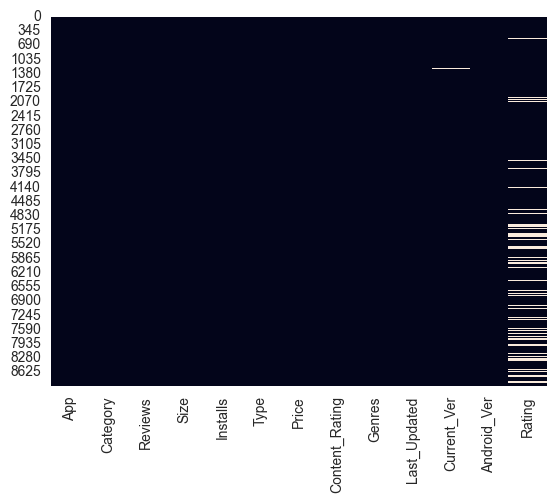

In [33]:
sns.heatmap(df.isnull(), cbar=False)

In [34]:
df["Rating"].fillna(df["Rating"].median())

0       3.9
1       4.7
2       4.3
3       4.4
4       3.8
       ... 
8963    4.3
8964    4.5
8965    5.0
8966    4.3
8967    4.5
Name: Rating, Length: 8968, dtype: float64

In [35]:
df=df.dropna()
df=df.drop_duplicates()
df.isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
Rating            0
dtype: int64

In [36]:
df["Reviews"]=df["Reviews"].astype("float")

In [37]:
df.dtypes

App                object
Category           object
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
Rating            float64
dtype: object

In [38]:
df["Size"]=df["Size"].str.replace("M","e6").str.replace("K","e3").str.replace("k","e3")
a=df[df["Size"]!="Varies with device"]["Size"].astype("float").median()
df["Size"]=df["Size"].replace("Varies with device",a)

In [39]:
df["Size"].value_counts()

Size
14000000.0    1200
12e6           130
14e6           124
15e6           117
13e6           116
              ... 
210e3            1
609e3            1
308e3            1
306e3            1
619e3            1
Name: count, Length: 368, dtype: int64

In [40]:
df.Size=pd.to_numeric(df["Size"])

In [41]:
df.Size.head(3)

0    14000000.0
1     8700000.0
2     2800000.0
Name: Size, dtype: float64

In [42]:
df["Installs"].unique()

array(['500,000+', '5,000,000+', '100,000+', '50,000+', '1,000,000+',
       '10,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '50,000,000+', '1,000+', '500,000,000+', '100+',
       '500+', '10+', '5+', '50+', '1+'], dtype=object)

In [43]:
df["Installs"]=df["Installs"].apply(lambda x: x.replace("+",""))
df["Installs"]=df["Installs"].apply(lambda x: x.replace(",",""))
df["Installs"]=df["Installs"].apply(lambda x:int(x))

In [44]:
df["Installs"]

0         500000
1        5000000
2         100000
3          50000
4          50000
          ...   
8961        1000
8962         500
8964        5000
8965         100
8967    10000000
Name: Installs, Length: 7187, dtype: int64

In [45]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$7.99', '$5.99', '$2.99', '$1.99', '$6.99',
       '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49', '$2.49',
       '$10.99', '$1.50', '$19.99', '$10.00', '$33.99', '$39.99', '$3.95',
       '$4.49', '$1.49', '$1.70', '$3.88', '$17.99', '$399.99', '$400.00',
       '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59',
       '$6.49', '$1.29', '$379.99', '$37.99', '$18.99', '$389.99',
       '$8.49', '$1.75', '$14.00', '$2.00', '$2.59', '$19.40', '$3.90',
       '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$4.60', '$2.95',
       '$2.90', '$2.56', '$1.00', '$1.20'], dtype=object)

In [46]:
df["Price"]=df["Price"].apply(lambda x: x.replace("$",""))
df["Price"]=df["Price"].apply(lambda x:float(x))

In [47]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   7.99,   5.99,   2.99,   1.99,   6.99,
         9.99,   7.49,   0.99,   9.  ,   5.49,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,   2.49,  10.99,   1.5 ,
        19.99,  10.  ,  33.99,  39.99,   3.95,   4.49,   1.49,   1.7 ,
         3.88,  17.99, 399.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   2.5 ,   1.59,   6.49,   1.29, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   2.59,  19.4 ,   3.9 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   4.6 ,   2.95,   2.9 ,
         2.56,   1.  ,   1.2 ])

In [48]:
df["Genres"].unique()

array(['Art & Design;Pretend Play', 'Art & Design',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Brain Games',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure;Action & Adventure', 'Arcade', 'Casual',
       'Card', 'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Sports',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia'

In [49]:
df["Genres"]=df["Genres"].str.split(";").str[0]
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Music', 'Word', 'Racing', 'Sports',
       'Simulation', 'Board', 'Role Playing', 'Trivia', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [50]:
df["Genres"].value_counts()

Genres
Tools                      596
Entertainment              444
Education                  417
Action                     301
Communication              263
Productivity               260
Photography                255
Medical                    252
Personalization            251
Finance                    251
Sports                     246
Lifestyle                  243
Business                   224
Health & Fitness           222
Social                     207
Casual                     202
News & Magazines           187
Arcade                     173
Shopping                   167
Simulation                 166
Travel & Local             157
Books & Reference          136
Video Players & Editors    132
Dating                     130
Puzzle                     111
Maps & Navigation          104
Racing                      93
Role Playing                90
Strategy                    81
Food & Drink                81
Educational                 80
Adventure                   75
W

In [51]:
df["Last_Updated"].head(3)

0    January 15, 2018
1      August 1, 2018
2       June 20, 2018
Name: Last_Updated, dtype: object

In [52]:
df["Last_Updated"]=pd.to_datetime(df["Last_Updated"])
df["Updated_Day"]=df["Last_Updated"].dt.day
df["Updated_Month"]=df["Last_Updated"].dt.month
df["Updated_Year"]=df["Last_Updated"].dt.year
df=df.drop("Last_Updated",axis=1)
df.head(3)

,App,Category,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Current_Ver,Android_Ver,Rating,Updated_Day,Updated_Month,Updated_Year
0,Coloring book moana,ART_AND_DESIGN,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design,2.0.0,4.0.3 and up,3.9,15,1,2018
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,1,8,2018
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design,1.1,4.4 and up,4.3,20,6,2018


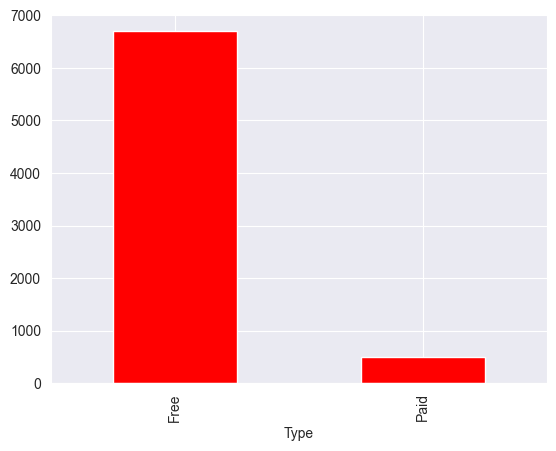

In [53]:
df["Type"].value_counts().plot(kind="bar",color="red")
plt.show()

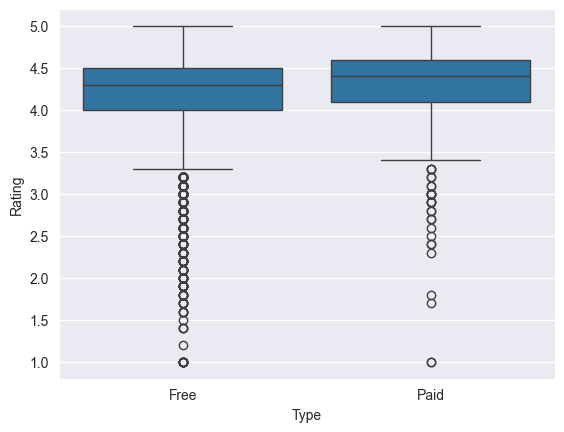

In [54]:
sns.boxplot(data=df,x="Type",y="Rating")
plt.show()

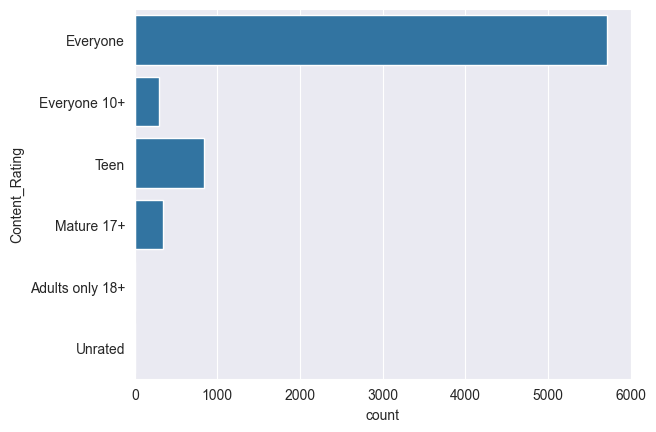

In [55]:
sns.countplot(data=df,y="Content_Rating")
plt.show()

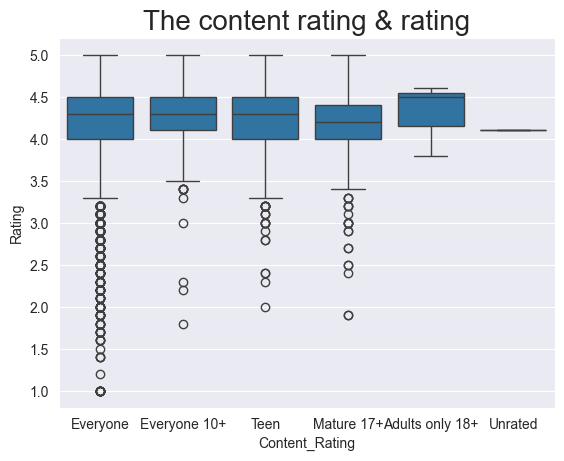

In [56]:
sns.boxplot(data=df,x="Content_Rating",y="Rating")
plt.title("The content rating & rating", size=20)
plt.show()

In [57]:
cats=df["Category"].value_counts()
sns.barplot(x=cats.values,y=cats.index,data=df)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 7187 and the vector passed to `x` has length 33.

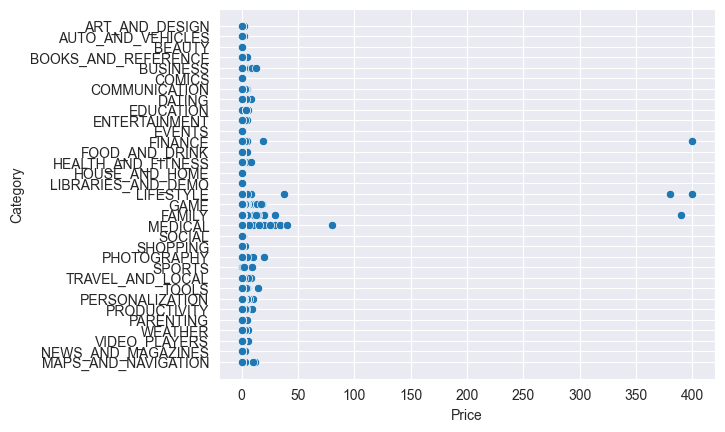

In [58]:
sns.scatterplot(data=df,x="Price",y="Category")
plt.show()

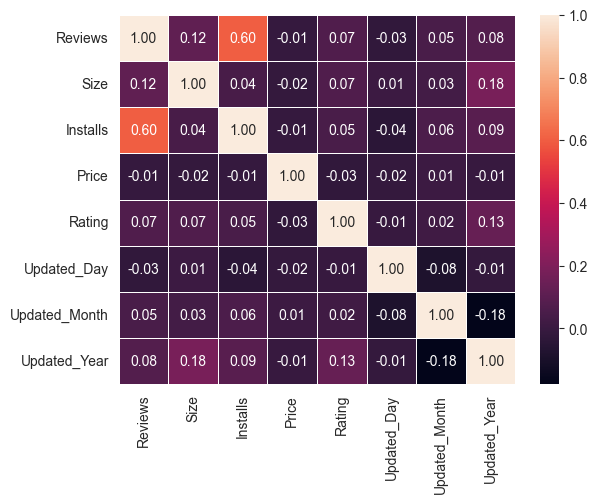

In [59]:
numeric_df = df.select_dtypes(include=["number"])  # Yalnızca sayısal sütunları seç
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.5, fmt=".2f")
plt.show()

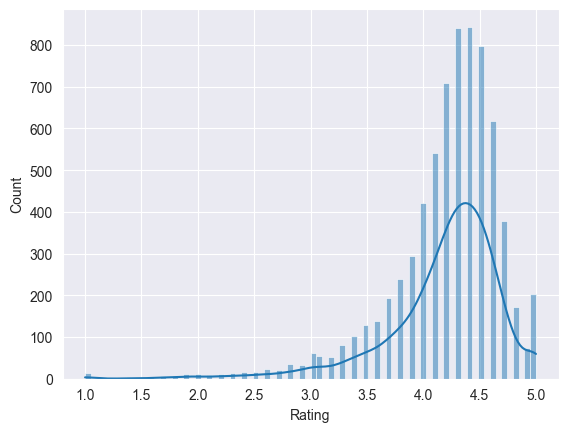

In [60]:
sns.histplot(df["Rating"],kde=True)
plt.show()

In [61]:
datanum=[col for col in df.columns if df[col].dtype!='O']
datanum

['Reviews',
 'Size',
 'Installs',
 'Price',
 'Rating',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [62]:
dfnum=df[datanum]
dfnum.head(3)

,Reviews,Size,Installs,Price,Rating,Updated_Day,Updated_Month,Updated_Year
0,967.0,14000000.0,500000,0.0,3.9,15,1,2018
1,87510.0,8700000.0,5000000,0.0,4.7,1,8,2018
2,967.0,2800000.0,100000,0.0,4.3,20,6,2018


In [63]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [64]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [65]:
for col in dfnum.columns:
    has_outliers(dfnum, col)

Reviews yes
Reviews no
Size no
Installs yes
Installs no
Price yes
Price no
Rating yes
Rating no
Updated_Day no
Updated_Month no
Updated_Year yes
Updated_Year no


In [66]:
def replace_with_thresholds(df, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(df, variable)
        df.loc[(df[variable] < low_limit), variable] = low_limit
        df.loc[(df[variable] > up_limit), variable] = up_limit

In [67]:
replace_with_thresholds(dfnum, dfnum.columns)

C:\Users\yousi\AppData\Local\Temp\ipykernel_30824\3429160474.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-7.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df[variable] < low_limit), variable] = low_limit


In [68]:
for col in dfnum.columns:
    has_outliers(dfnum, col)

Reviews no
Size no
Installs no
Price no
Rating no
Updated_Day no
Updated_Month no
Updated_Year no


In [78]:
y=df["Rating"]
x=dfnum.drop(columns=['Rating'])

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.81,random_state=81)

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.07671472296388038

In [76]:
actual_test_csv = pd.read_csv("../extracted_test_rows_with_Y.csv")
actual_test_csv = rename_columns(actual_test_csv)
X_test_set = actual_test_csv.drop(columns=['Rating'])
y_test_set = actual_test_csv['Rating']

In [77]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Predict on test set
y_pred = model.predict(X_test_set)

mse = mean_squared_error(y_test_set, y_pred)
mae = mean_absolute_error(y_test_set, y_pred)
r2 = r2_score(y_test_set, y_pred)

# Output
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")
# print(f"Test RMSE: {rmse(y_test_set, y_pred):.4f}")
#

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Android_Ver
- App
- Category
- Content_Rating
- Current_Ver
- ...
Feature names seen at fit time, yet now missing:
- Rating
- Updated_Day
- Updated_Month
- Updated_Year
